In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd_data = pd.read_csv('전국건강증진센터표준데이터.csv', encoding='cp949')
print(pd_data.head())

       건강증진센터명 건강증진센터구분               소재지도로명주소                   소재지지번주소  \
0     맞춤형건강클리닉     건강증진      인천광역시 연수구 함박뫼로 13       인천광역시 연수구 청학동 465-4   
1     정신건강복지센터     정신보건   경상북도 청송군 청송읍 의료원길 19  경상북도 청송군 청송읍 금곡리 1056-54   
2   중구정신건강복지센터     정신보건   인천광역시 중구 참외전로72번길 21           인천광역시 중구 전동 2-1   
3  의령군정신건강복지센터     정신보건  경상남도 의령군 의령읍 의병로8길 16      경상남도 의령군 의령읍 서동리 534   
4  고성군정신건강복지센터     정신보건     강원도 고성군 간성읍 수성로 30       강원도 고성군 간성읍 신안리 178   

          위도          경도                                           건강증진업무내용  \
0  37.419132  126.671161          치매검진, 당뇨.고혈압 상담 및 검사, 뇌경색.심뇌혈관질환, 정신건강 상담   
1  36.431132  129.051804          중증정신질환자 관리+정신건강증진사업+아동청소년 정신건강증진사업+자살예방사업   
2  37.477217  126.629108                        정신건강사업+생명피움사업+종합자가검진 및 상담제공   
3  35.317820  128.254769  정신질환 예방ㆍ상담ㆍ치료연계+정신질환자 주간재활프로그램 운영+자살예방 및 정신건강증...   
4  38.377617  128.472194                                        자살예방+정신건강증진   

  운영시작시각 운영종료시각     휴무일정보  ...  영양사수            기타인력현황  \
0  09:00  

In [5]:
for i, n in enumerate(pd_data.columns):
    print(i, n)

0 건강증진센터명
1 건강증진센터구분
2 소재지도로명주소
3 소재지지번주소
4 위도
5 경도
6 건강증진업무내용
7 운영시작시각
8 운영종료시각
9 휴무일정보
10 건물면적
11 의사수
12 간호사수
13 사회복지사수
14 영양사수
15 기타인력현황
16 기타이용안내
17 운영기관전화번호
18 운영기관명
19 관리기관전화번호
20 관리기관명
21 데이터기준일자
22 제공기관코드
23 제공기관명


In [14]:
# 전국건강증진센터에서 의료인이 없는 곳은 몇군대인가
# pd_data[['의사수', '간호사수']]
# pd_data.loc[:, ['의사수', '간호사수']]
# pd_data.iloc[:, [11, 12]]
# pd_data.iloc[:, 11:13]
df1 = pd_data.loc[:, '의사수':'간호사수']

In [24]:
print(df1)
print('*****************')
print(df1.dtypes) # dtypes로 해야 받아준다.
print('*****************')
s_sum = df1['의사수'] + df1['간호사수']
print(s_sum) # 이것도 Series로 나온다.
print('*****************')
print(s_sum.describe()) # mean 이랑 50%가 차이가 많이 나지 않으면 outlier가 많지 않다는 것이다.

     의사수  간호사수
0      0     5
1      0     4
2      1     5
3      0     6
4      0     4
..   ...   ...
290    0     0
291    1     1
292    1     0
293    0     3
294    1    13

[295 rows x 2 columns]
*****************
의사수     int64
간호사수    int64
dtype: object
*****************
0       5
1       4
2       6
3       6
4       4
       ..
290     0
291     2
292     1
293     3
294    14
Length: 295, dtype: int64
*****************
count    295.000000
mean       3.433898
std        3.401911
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       18.000000
dtype: float64


2     54
1     53
0     43
3     36
4     31
5     19
6     19
7     10
8      7
10     6
16     4
13     3
9      3
14     3
12     2
11     1
18     1
dtype: int64
0     43
1     53
2     54
3     36
4     31
5     19
6     19
7     10
8      7
9      3
10     6
11     1
12     2
13     3
14     3
16     4
18     1
dtype: int64


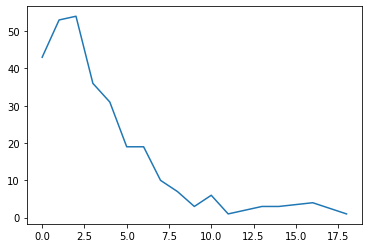

In [29]:
cnt = s_sum.value_counts() # value : counts
print(cnt)
# index값으로 정렬하면 된다.(index == 의사 + 간호사, value == 몇군대)
print(cnt.sort_index())
_, axe = plt.subplots()
axe.plot(cnt.sort_index())

In [30]:
df2 = pd_data.loc[:, '사회복지사수':'영양사수']
print(df2)

     사회복지사수  영양사수
0         0   0.0
1         1   0.0
2        12   0.0
3         1   0.0
4         1   0.0
..      ...   ...
290       0   0.0
291       0   0.0
292       7   0.0
293       0   1.0
294       2   NaN

[295 rows x 2 columns]


count    295.000000
mean       5.355932
std        6.436933
min        0.000000
25%        1.000000
50%        3.000000
75%        8.000000
max       42.000000
dtype: float64
0.0     50
1.0     67
2.0     30
3.0     16
4.0     11
5.0     10
6.0     15
7.0     15
8.0     13
9.0      6
10.0    10
11.0     7
12.0     9
13.0     6
14.0     4
15.0     6
16.0     2
17.0     2
18.0     3
19.0     2
20.0     2
21.0     3
23.0     1
27.0     1
31.0     1
32.0     1
33.0     1
42.0     1
dtype: int64


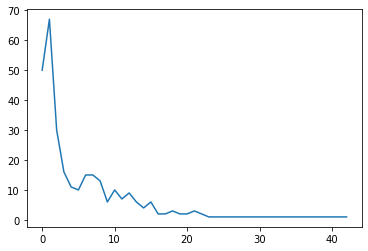

In [44]:
df2 = df2.replace(np.NaN, 0.0)
Ser_sum = df2['사회복지사수'] + df2['영양사수']
#print(Ser_sum)

print(Ser_sum.describe())
cnt1 = Ser_sum.value_counts()
print(cnt1.sort_index())

_,axe = plt.subplots()
axe.plot(cnt1.sort_index())

In [49]:
 # 가장 많은 사회복지사 + 영양사 가 있는 곳의 index
    
print(Ser_sum[Ser_sum==42.0])
print('***********************************************************')

filter1 = Ser_sum == 42.0
print(pd_data[filter1])

56    42.0
dtype: float64
***********************************************************
        건강증진센터명 건강증진센터구분         소재지도로명주소            소재지지번주소         위도  \
56  부천시정신건강복지센터     정신보건  경기도 부천시 성오로 172  경기도 부천시 오정동 129번지  37.528349   

            경도                                 건강증진업무내용 운영시작시각 운영종료시각  \
56  126.796026  중증정신질환자관리사업+아동청소년정신보건사업+자살예방사업+정신건강증진사업  09:00  18:00   

          휴무일정보  ...  영양사수  기타인력현황  기타이용안내      운영기관전화번호       운영기관명  \
56  토요일+일요일+공휴일  ...   0.0       5     NaN  032-654-4024  순천향대학교부천병원   

        관리기관전화번호   관리기관명     데이터기준일자   제공기관코드    제공기관명  
56  032-625-4131  부천시보건소  2022-05-31  3860000  경기도 부천시  

[1 rows x 24 columns]
